In [15]:
# -*- coding: utf-8 -*-
"""
Created on Mon May 22 15:48:33 2017

@author: peachl
"""


import pandas as pd
import scipy.signal as sig
import scipy.stats as stats
import matplotlib.pyplot as plt
import os
import numpy as np
from datetime import datetime
import plotly
import plotly.graph_objs as go
plotly.offline.init_notebook_mode()


def create_displacements_df_mk4(path):
    displacements_df = read_dataframe(path)
    try:
        os.chdir(path)
    except:
        print ("No directory", path)
    return displacements_df

def create_welch_df_mk4(dataframe):
    """Takes a single column displacement DataFrame in metres"""
    x,y = sig.welch(dataframe, 2.56, noverlap=256, nperseg = 512, window= ('hann')) #welches method with a Hann window and overlapping segments
    dic = {'x':x,'y':y}
    welch_df = pd.DataFrame(dic)
    return welch_df

def calc_welch_mk4(welch_df, psd_dic = {}, save = False, line_name = ''):
    """ Given a dataframe will run welch's methods on the values, printing out the maxmimum power spectral density and the 
        frequency it occurs at, plots the output and returns the data
    """
    psd_dic[line_name] = [welch_df.x.max(), welch_df.y.ix[welch_df.y==welch_df.y.max()]]
    plt.plot(welch_df.x,welch_df.y, label=line_name)
    plt.ylabel('S(f) m^2/Hz')
    plt.xlabel('Frequency (Hz)')
    plt.legend()
    plotly.offline.plot({"data": [go.Scatter(x = welch_df['x'], y = welch_df['y'])],
                                  "layout": go.Layout(showlegend = False, title = line_name, xaxis = dict(title= 'Frequency (Hz)'), yaxis = dict(title = 'S(f) m^2/Hz'))}, show_link = False)
    
    return welch_df, psd_dic
        
        
def read_dataframe(path, start = None, end = None, filter_signal_error=True):
    """ Given a path to a folder containing a DataFrame file called raw_plus_std created by hebtools returns the a subset of the 
        heave column converted from centimetres to metres """
    try:
        displacement_df = pd.read_pickle(path + '/' + 'raw_plus_std')
        if filter_signal_error:
            displacement_df = displacement_df[displacement_df.signal_error == 0]            
        return displacement_df.heave[start:end]/100
    except:
        return pd.Series()

def read_raw(raw_file_path, seg_overlap = None, filter = False):
    """ Given a path to a raw file reads it using Pandas and returns a DataFrame object optionally filtered. """
    raw_df = pd.read_csv(raw_file_path, delimiter='\t', names=['seconds', 'signal_quality', 'heave', 'north', 'west'])
    if filter:
        raw_df = raw_df[raw_df.signal_quality<1]
    return raw_df
    

def plot_raw_file(raw_file_path, seg_overlap = None, filter = False, column = 'heave'):
    """ Takes path to a raw file as input with option to plot filter/unfiltered or any of the directions returns output of
        calc_welch the plt object and data in chart.
    """
    raw_df = read_raw(raw_file_path, seg_overlap, filter)
    print(raw_df)
    print (raw_df.describe())
    print ("Skewness", stats.skew(raw_df[column]))
    print ("Kurtosis", stats.kurtosis(raw_df[column]))
    welch_df = create_welch_df_mk4(raw_df[column])
    return calc_welch_mk4(welch_df, line_name = raw_file_path + ' Filter ' + str(filter) )

NameError: name 'sin' is not defined

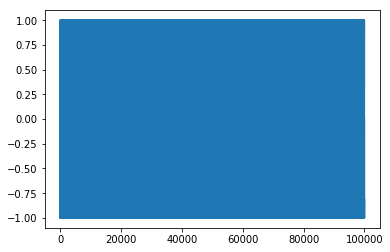